In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
from tensorflow.keras.datasets.imdb import load_data as load_imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.model_selection import StratifiedShuffleSplit

import pymc3 as pm

from modules.neural_networks import BayesianWordEmbedding

from modules.viz_utils import visulize_categorical_post, visulize_bernoulli_post, visualize_embedding

# Sentiment Classification

In [5]:
(X_tr, y_tr), (X_ts, y_ts) = load_imdb(
    skip_top=100,
    num_words=2000,
    maxlen=180
)
X_tr = pad_sequences(X_tr, padding='post', value=2)
X_ts = pad_sequences(X_ts, padding='post', value=2)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
C:\Users\penthotal\miniconda3\envs\bayes_env\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\penthotal\miniconda3\envs\bayes_env\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different leng

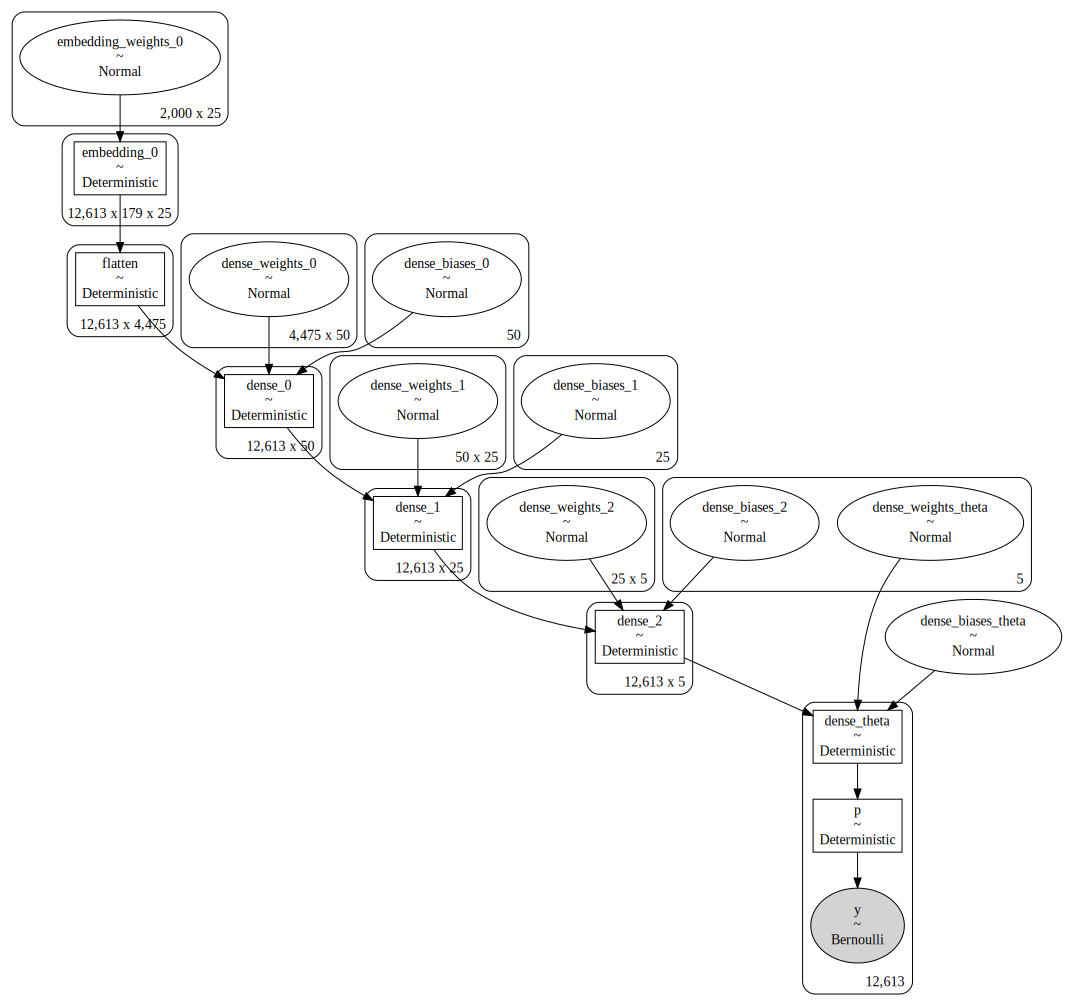

In [14]:
embedding_model = BayesianWordEmbedding(
    X=X_tr, 
    y=y_tr, 
    shape_out=1, 
    likelyhood_model='bernoulli_lk', 
    prior=pm.Normal,
    vocabulary_size=int(X_tr.max()+1), 
    embedding_size=25, 
    layers=(50, 25, 5),
    activation='relu', 
    batch_size=256,
    mu=0,
    sigma=1
)
embedding_model.show_graph()

In [15]:
embedding_model.fit(n=10000)
embedding_trace = embedding_model.predict(
    X_ts, 
    y_ts, 
    ['p']
)

C:\Users\penthotal\miniconda3\envs\bayes_env\lib\site-packages\theano\gpuarray\dnn.py:192: UserWarning: Your cuDNN version is more recent than Theano. If you encounter problems, try updating Theano or downgrading cuDNN to a version >= v5 and <= v7.
  warnings.warn(


Interrupted at 3,511 [35%]: Average Loss = 11,271


KeyboardInterrupt: 